In [1]:
%pip install torch

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install torchvision

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
import numpy as np
import torch

tensor = torch.tensor([1, 2, 3, 4, 5])
tensor2 = torch.from_numpy(np.array([1, 2, 3, 4, 5]))
tensor3 = torch.rand((3, 3))

print(tensor)
print(tensor2)
print(tensor3)

tensor([1, 2, 3, 4, 5])
tensor([1, 2, 3, 4, 5], dtype=torch.int32)
tensor([[0.4377, 0.7019, 0.4234],
        [0.9541, 0.1530, 0.6634],
        [0.6265, 0.4865, 0.3233]])


In [3]:
# Automatic Differentiation is done with autograd
x = torch.ones((2, 2), requires_grad=True) # requires_grad=True means that we want to compute the gradient of x
y = x + 2
z = y * y * 3

out = z.mean()
out.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [3]:
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module): # nn.Module is the base class for all models in PyTorch, and we need to inherit from it
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784, 256) # 28x28 = 784 = num of pixels (input), 256 = num of neurons in the hidden layer; the one we choose
        self.fc2 = nn.Linear(256, 128) # 256 = num of neurons in the hidden layer; the one we choose, 128 = num of neurons in the hidden layer; the one we choose
        self.fc3 = nn.Linear(128, 10) # 128 = num of neurons in the hidden layer; the one we choose, 10 = num of classes (output)
        # The number of layers can be change, but the input and output layers must be the same
        # The psude output of one layer will have the same number of neurons as the input of the next layer

    def forward(self, x): # This method defines the forward pass of the network, makes it pass through the layers
        x = F.relu(self.fc1(x)) # ReLU is the activation function, it is used to introduce non-linearity to the network
        x = F.relu(self.fc2(x)) # ReLU is rectified linear unit function, which takes the maximum of 0 and the input, therefore only outputs positive values
        x = self.fc3(x) # Acticvation function takes in one value and outputs anoter
        return x # Have many activation functions, but ReLU is the most common

model = MLP()
print(model)

MLP(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [5]:
import torch
criterion = nn.CrossEntropyLoss() # Loss function, used to measure the difference between the predicted and the actual values
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Optimizer, used to update the weights of the network; Adam is the most common optimizer as it is more efficient than the others

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



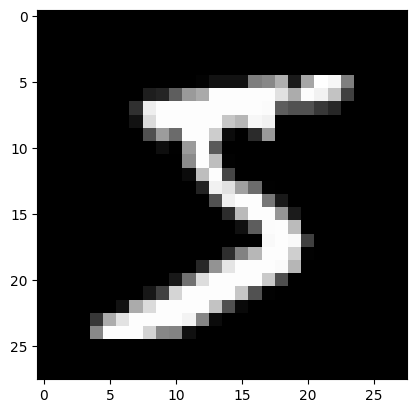

In [6]:
from torchvision import datasets, transforms # MNIST dataset is prebuilt in PyTorch
import matplotlib.pyplot as plt

# Load the MNIST dataset: 28x28 images of handwritten digits from 0 to 9
tansform = transforms.Compose([transforms.ToTensor()]) # Transform the images to tensors, as PyTorch works with tensors not images
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=tansform) # Load the training set
# the transform parameter is used to transform the images to tensors, defined above

# Load the test set
image, label = mnist_trainset[0] #image is the image of the number which is a 28x28 tensor, label is the number itself

# Plot the image
plt.imshow(image.squeeze().numpy(), cmap='gray')
plt.show()

In [8]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Data transformation and loading
transform = transforms.Compose([transforms.ToTensor()])
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(mnist_trainset, batch_size=64, shuffle=True) # DataLoader is used to load the data in batches, shuffle=True means that the data will be shuffled before loading
# batching is used to speed up the training process, as it is faster to train on a batch of data than on the whole dataset

# Training loop, one loop is called an epoch
epcohs = 10
for epoch in range(epcohs):
    running_loss = 0.0
    for inputs, labels in trainloader:
        input = inputs.view(-1, 28*28) # Flatten the input images to a vector
        optimizer.zero_grad() # Zero the gradients on every backpropagation ----> this is important
        output = model(input) # given the input, the model will output the predicted values
        loss = criterion(output, labels) # calculate the loss
        loss.backward() # backpropagation
        optimizer.step() # update the weights (Adam optimizer is used here)
        running_loss += loss.item()

    print(f'Epoch {epoch+1}/{epcohs}, Loss: {loss.item()}')

Epoch 1/10, Loss: 0.051379404962062836
Epoch 2/10, Loss: 0.05472444370388985
Epoch 3/10, Loss: 0.017733203247189522
Epoch 4/10, Loss: 0.21691831946372986
Epoch 5/10, Loss: 0.0049329414032399654
Epoch 6/10, Loss: 0.07644681632518768
Epoch 7/10, Loss: 0.0006050391239114106
Epoch 8/10, Loss: 0.060720160603523254
Epoch 9/10, Loss: 0.001087200129404664
Epoch 10/10, Loss: 0.020603839308023453


In [9]:
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform) # Load the test set, by train=False
testloader = DataLoader(testset, batch_size=64, shuffle=False)

def calculate_accuracy(model, loader):
    model.eval() # set the model to evaluation mode, no more weights updates
    total = correct = 0
    with torch.no_grad():
        for inputs, labels in loader: # loop through the test set in batches
            inputs = inputs.view(-1, 28*28) # flatten the input images
            outputs = model(inputs) # get the predicted values = probabilities for each class
            _, predicted = torch.max(outputs, 1) # get the predicted class
            total += labels.size(0) # total number of labels
            correct += (predicted == labels).sum().item() # number of correct predictions, checked against the actual labels in loader

    return 100 * correct / total

accurcy = calculate_accuracy(model, testloader)
print(f'Accuracy: {accurcy}%')

Accuracy: 97.97%


In [ ]:
# self.dropout = nn.Dropout(0.2) # Dropout is a regularization technique used to prevent overfitting
# Each trianing iteration, a random set of neurons are dropped out, meaning that they are not used in the forward and backward pass
# this forces the network to learn more robust features, as it cannot rely on the same neurons all the time
# The dropout rate is the probability of dropping out a neuron, usually between 0.2 and 0.5

In [10]:
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 512)
        self.fc4 = nn.Linear(512, 512)
        self.fc5 = nn.Linear(512, 512)
        self.fc6 = nn.Linear(512, 512)
        self.fc7 = nn.Linear(512, 512)
        self.fc8 = nn.Linear(512, 512)
        self.fc9 = nn.Linear(512, 512)
        self.fc10 = nn.Linear(512, 512)
        self.fc11 = nn.Linear(512, 512)
        self.fc12 = nn.Linear(512, 512)
        self.fc13 = nn.Linear(512, 512)
        self.fc14 = nn.Linear(512, 512)
        self.fc15 = nn.Linear(512, 512)
        self.fc16 = nn.Linear(512, 512)
        self.fc17 = nn.Linear(512, 512)
        self.fc18 = nn.Linear(512, 512)
        self.fc19 = nn.Linear(512, 512)
        self.fc20 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = F.relu(self.fc4(x))
        x = self.dropout(x)
        x = F.relu(self.fc5(x))
        x = self.dropout(x)
        x = F.relu(self.fc6(x))
        x = self.dropout(x)
        x = F.relu(self.fc7(x))
        x = self.dropout(x)
        x = F.relu(self.fc8(x))
        x = self.dropout(x)
        x = F.relu(self.fc9(x))
        x = self.dropout(x)
        x = F.relu(self.fc10(x))
        x = self.dropout(x)
        x = F.relu(self.fc11(x))
        x = self.dropout(x)
        x = F.relu(self.fc12(x))
        x = self.dropout(x)
        x = F.relu(self.fc13(x))
        x = self.dropout(x)
        x = F.relu(self.fc14(x))
        x = self.dropout(x)
        x = F.relu(self.fc15(x))
        x = self.dropout(x)
        x = F.relu(self.fc16(x))
        x = self.dropout(x)
        x = F.relu(self.fc17(x))
        x = self.dropout(x)
        x = F.relu(self.fc18(x))
        x = self.dropout(x)
        x = F.relu(self.fc19(x))
        x = self.dropout(x)
        x = self.fc20(x)
        return x

model = MLP()

import torch
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

from torchvision import datasets, transforms
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor()])
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([transforms.ToTensor()])
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(mnist_trainset, batch_size=64, shuffle=True)

epochs = 25
for epoch in range(epochs):
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs = inputs.view(-1, 28*28)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(trainloader)}')

testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

def calculate_accuracy(model, loader):
    model.eval()
    total = correct = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.view(-1, 28*28)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

accuracy = calculate_accuracy(model, testloader)
print(f'Accuracy: {accuracy}%')

Epoch 1/25, Loss: 1.5126396148824997
Epoch 2/25, Loss: 1.3020354915402337
Epoch 3/25, Loss: 1.3055342716067584
Epoch 4/25, Loss: 1.057545487242721
Epoch 5/25, Loss: 0.8778234745330139
Epoch 6/25, Loss: 0.8214235992383346
Epoch 7/25, Loss: 0.9692026169251785
Epoch 8/25, Loss: 0.7628819005829948
Epoch 9/25, Loss: 0.6976475638113042
Epoch 10/25, Loss: 0.6054678109885533
Epoch 11/25, Loss: 0.5880031196245634
Epoch 12/25, Loss: 0.4925762576493881
Epoch 13/25, Loss: 0.5306714294847649
Epoch 14/25, Loss: 0.5075141156930277
Epoch 15/25, Loss: 0.5320630453066277
Epoch 16/25, Loss: 0.5235460406935799
Epoch 17/25, Loss: 0.5105780136864831
Epoch 18/25, Loss: 0.5206768653238378
Epoch 19/25, Loss: 0.47896728937083216
Epoch 20/25, Loss: 0.5477826265590404
Epoch 21/25, Loss: 0.5804685233339572
Epoch 22/25, Loss: 0.6911037347908976
Epoch 23/25, Loss: 0.7409774065812005
Epoch 24/25, Loss: 0.8312561752826675
Epoch 25/25, Loss: 0.7636924993826636
Accuracy: 80.01%


In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim.lr_scheduler import StepLR

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(512, 512)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(512, 512)
        self.dropout3 = nn.Dropout(0.3)
        self.fc4 = nn.Linear(512, 512)
        self.dropout4 = nn.Dropout(0.3)
        self.fc5 = nn.Linear(512, 512)
        self.dropout5 = nn.Dropout(0.3)
        self.fc6 = nn.Linear(512, 512)
        self.dropout6 = nn.Dropout(0.3)
        self.fc7 = nn.Linear(512, 512)
        self.dropout7 = nn.Dropout(0.3)
        self.fc8 = nn.Linear(512, 512)
        self.dropout8 = nn.Dropout(0.3)
        self.fc9 = nn.Linear(512, 512)
        self.dropout9 = nn.Dropout(0.3)
        self.fc10 = nn.Linear(512, 512)
        self.dropout10 = nn.Dropout(0.3)
        self.fc11 = nn.Linear(512, 512)
        self.dropout11 = nn.Dropout(0.3)
        self.fc12 = nn.Linear(512, 512)
        self.dropout12 = nn.Dropout(0.3)
        self.fc13 = nn.Linear(512, 512)
        self.dropout13 = nn.Dropout(0.3)
        self.fc14 = nn.Linear(512, 512)
        self.dropout14 = nn.Dropout(0.3)
        self.fc15 = nn.Linear(512, 512)
        self.dropout15 = nn.Dropout(0.3)
        self.fc16 = nn.Linear(512, 512)
        self.dropout16 = nn.Dropout(0.3)
        self.fc17 = nn.Linear(512, 512)
        self.dropout17 = nn.Dropout(0.3)
        self.fc18 = nn.Linear(512, 512)
        self.dropout18 = nn.Dropout(0.3)
        self.fc19 = nn.Linear(512, 512)
        self.dropout19 = nn.Dropout(0.3)
        self.fc20 = nn.Linear(512, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = self.dropout3(x)
        x = F.relu(self.fc4(x))
        x = self.dropout4(x)
        x = F.relu(self.fc5(x))
        x = self.dropout5(x)
        x = F.relu(self.fc6(x))
        x = self.dropout6(x)
        x = F.relu(self.fc7(x))
        x = self.dropout7(x)
        x = F.relu(self.fc8(x))
        x = self.dropout8(x)
        x = F.relu(self.fc9(x))
        x = self.dropout9(x)
        x = F.relu(self.fc10(x))
        x = self.dropout10(x)
        x = F.relu(self.fc11(x))
        x = self.dropout11(x)
        x = F.relu(self.fc12(x))
        x = self.dropout12(x)
        x = F.relu(self.fc13(x))
        x = self.dropout13(x)
        x = F.relu(self.fc14(x))
        x = self.dropout14(x)
        x = F.relu(self.fc15(x))
        x = self.dropout15(x)
        x = F.relu(self.fc16(x))
        x = self.dropout16(x)
        x = F.relu(self.fc17(x))
        x = self.dropout17(x)
        x = F.relu(self.fc18(x))
        x = self.dropout18(x)
        x = F.relu(self.fc19(x))
        x = self.dropout19(x)
        x = self.fc20(x)
        return x

model = MLP()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)  # Decay LR by 0.1 every 10 epochs

from torchvision import datasets, transforms
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor()])
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([transforms.ToTensor()])
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(mnist_trainset, batch_size=64, shuffle=True)

epochs = 25
patience = 10  # Number of epochs to wait before early stopping
best_loss = float('inf')
early_stop_count = 0

for epoch in range(epochs):
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs = inputs.view(-1, 28*28)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(trainloader)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss}')

    # Learning rate scheduler
    scheduler.step()

    # Early stopping
    if epoch_loss < best_loss:
        best_loss = epoch_loss
        early_stop_count = 0
        best_model_state = model.state_dict()  # Save the best model state
    else:
        early_stop_count += 1
        if early_stop_count >= patience:
            print("Early stopping triggered!")
            break

# Load the best model state
model.load_state_dict(best_model_state)

testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

def calculate_accuracy(model, loader):
    model.eval()
    total = correct = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.view(-1, 28*28)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

accuracy = calculate_accuracy(model, testloader)
print(f'Accuracy: {accuracy}%')

Epoch 1/25, Loss: 2.300757894765085
Epoch 2/25, Loss: 1.9251194573414605
Epoch 3/25, Loss: 1.3234803150457615
Epoch 4/25, Loss: 1.2662203519710347
Epoch 5/25, Loss: 1.0838254706056387
Epoch 6/25, Loss: 0.9625076888593783
Epoch 7/25, Loss: 0.8446106608234235
Epoch 8/25, Loss: 1.2405749235326038
Epoch 9/25, Loss: 0.8114790470996646
Epoch 10/25, Loss: 0.8047132861576101
Epoch 11/25, Loss: 0.7888777113037069
Epoch 12/25, Loss: 0.6126897650550424
Epoch 13/25, Loss: 0.5685630135698867
Epoch 14/25, Loss: 0.538674927819004
Epoch 15/25, Loss: 0.5160110651461809
Epoch 16/25, Loss: 0.4863608401975652
Epoch 17/25, Loss: 0.46719648882842013
Epoch 18/25, Loss: 0.4392116416269528
Epoch 19/25, Loss: 0.41799395828485997
Epoch 20/25, Loss: 0.40262731115446926
Epoch 21/25, Loss: 0.38418888663654643
Epoch 22/25, Loss: 0.3865060942418286
Epoch 23/25, Loss: 0.38423107656588684
Epoch 24/25, Loss: 0.3716441736435458
Epoch 25/25, Loss: 0.3720252524767476
Accuracy: 45.74%


In [12]:
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.bn1 = nn.BatchNorm1d(512)  # Add batch normalization
        self.dropout1 = nn.Dropout(0.2)  # Adjust dropout rate
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.dropout3 = nn.Dropout(0.2)
        self.fc4 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten the input tensor
        x = F.relu(self.bn1(self.fc1(x)))  # Apply batch normalization and ReLU
        x = self.dropout1(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout3(x)
        x = self.fc4(x)
        return x

model = MLP()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize the data
])

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(mnist_trainset, batch_size=128, shuffle=True)  # Increase batch size

epochs = 30  # Increase the number of epochs

for epoch in range(epochs):
    running_loss = 0.0
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(trainloader)}')

testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=128, shuffle=False)

def calculate_accuracy(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

accuracy = calculate_accuracy(model, testloader)
print(f'Accuracy: {accuracy}%')

Epoch 1/30, Loss: 0.25980983799232094
Epoch 2/30, Loss: 0.11505023592205317
Epoch 3/30, Loss: 0.08424669247406569
Epoch 4/30, Loss: 0.0700625877048987
Epoch 5/30, Loss: 0.05702202471751553
Epoch 6/30, Loss: 0.050390784414226945
Epoch 7/30, Loss: 0.04695739888691349
Epoch 8/30, Loss: 0.04116162037137332
Epoch 9/30, Loss: 0.03539954930363195
Epoch 10/30, Loss: 0.034517317237372176
Epoch 11/30, Loss: 0.031698103229612556
Epoch 12/30, Loss: 0.028647250911992377
Epoch 13/30, Loss: 0.026591236675048927
Epoch 14/30, Loss: 0.023878818227430938
Epoch 15/30, Loss: 0.024980946857882325
Epoch 16/30, Loss: 0.023911134309337924
Epoch 17/30, Loss: 0.019307741735464158
Epoch 18/30, Loss: 0.020245982284559857
Epoch 19/30, Loss: 0.017178252481779496
Epoch 20/30, Loss: 0.01862286256009669
Epoch 21/30, Loss: 0.016783498484628408
Epoch 22/30, Loss: 0.015136679182721944
Epoch 23/30, Loss: 0.017004804825273726
Epoch 24/30, Loss: 0.015969918871078508
Epoch 25/30, Loss: 0.016583392421763613
Epoch 26/30, Loss: 

In [ ]:
"""
Here are the changes made to the original model:

Batch Normalization: Added batch normalization layers (nn.BatchNorm1d) after each linear layer to help stabilize the training process and allow for higher learning rates.
Dropout Rate: Reduced the dropout rate from 0.3 to 0.2 to prevent too much information loss during training.
Model Architecture: Adjusted the number of neurons in the hidden layers to (512, 256, 128) instead of (256, 128) to increase the model's capacity.
Data Normalization: Normalized the input data using the mean and standard deviation of the MNIST dataset (transforms.Normalize).
Batch Size: Increased the batch size from 64 to 128 for faster convergence.
Number of Epochs: Increased the number of training epochs from 10 to 30 to allow the model to train for longer.
Optimizer: Kept the Adam optimizer with a learning rate of 0.001.

To get the mean and standard deviation values for transforms.Normalize, you can calculate them from the dataset itself or use the pre-computed values for popular datasets like MNIST.
For the MNIST dataset, the mean and standard deviation values of (0.1307) and (0.3081) are widely used and accepted. These values were calculated by computing the mean and standard deviation of the pixel values across the entire MNIST training dataset.
If you're working with a different dataset, you can calculate the mean and standard deviation of the pixel values (or any other input features) using the following steps:

Load the dataset (or a subset of it) into memory.
Flatten the input data (e.g., for images, convert them to 1D vectors).
Calculate the mean and standard deviation across all examples using NumPy or PyTorch functions:

"""

import numpy as np
from torchvision import datasets

# Load the dataset
dataset = datasets.YourDataset(...)

# Flatten the input data
data = np.concatenate([np.array(x).flatten() for x, _ in dataset])

# Calculate mean and standard deviation
mean = np.mean(data)
std = np.std(data)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

"""
As for batch normalization, it is a widely used and effective technique in deep learning, but it doesn't always work equally well for all tasks or architectures. Here are some general guidelines on when batch normalization can be useful:

Deep Networks: Batch normalization is particularly helpful in deep neural networks (e.g., networks with more than 5-10 layers) as it helps mitigate the internal covariate shift and stabilize the training process.
Convolutional Neural Networks (CNNs): Batch normalization is commonly used in CNNs, as it can help accelerate the training of convolutional layers and improve the model's performance.
Recurrent Neural Networks (RNNs): Batch normalization has been shown to improve the training of RNNs, especially for longer sequences.
Non-Linear Activations: Batch normalization can be beneficial when using non-linear activation functions like ReLU, which can cause the gradients to become unstable or vanish during backpropagation.

However, there are cases where batch normalization may not be as effective or necessary:

Shallow Networks: In very shallow networks (e.g., 2-3 layers), batch normalization may not provide significant benefits, as the internal covariate shift is less severe.
Normalizing Inputs: If your input data is already well-normalized or standardized, batch normalization may have a less significant impact.
Small Batch Sizes: Batch normalization relies on computing statistics (mean and variance) over mini-batches. With very small batch sizes, these statistics may become noisy and less reliable, potentially hindering the benefits of batch normalization.
Certain Architectures: Some architectures, like ResNets or DenseNets, may already have built-in mechanisms (e.g., skip connections) that help mitigate the internal covariate shift, reducing the need for batch normalization.

A common approach is to start with a reasonable number of buckets (e.g., 10-20) and adjust based on the results:

    If buckets are too small (many empty or low-count buckets), increase the size.
    If buckets are too large (hiding important patterns), decrease the size.

Some formulas can serve as starting points:

    Square-root choice: Bucket count = sqrt(n), where n is the number of data points.
    Sturges' formula: Bucket count = log2(n) + 1
    Rice rule: Bucket count = 2 * cube_root(n)

"""